# US Accidents Exploratory Data Analysis

### LOADING OF THE DATASET

In [6]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# loading the dataset
#us_df=pd.read_csv("E:\\NUMPY proj\\EDA PROJ 1\\US_Accidents_March23.csv")

chunksize = 100000  # Adjust chunk size as needed
chunks = []

for chunk in pd.read_csv("E:\\NUMPY proj\\EDA PROJ 1\\US_Accidents_March23.csv", chunksize=chunksize):
                     # Process each chunk here, e.g., append to a list
    chunks.append(chunk)

 
us_df = pd.concat(chunks, ignore_index=True)

In [8]:
# diplaying the data
us_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


### 2.Data Preperation And Cleaning
 (i) look at the information about the data and the column
 (ii) Fix any missing or incorrect value

In [9]:
# retreiving the columns 
us_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
# printing information about the DataFrame
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
# returning description of the data in the DataFrame.
us_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [12]:
# counting numerical columns
numerics= ['int16','int32','int64','float16','float32','float64']
numeric_us_df = us_df.select_dtypes(include=numerics)
len(numeric_us_df)

7728394

In [13]:
# finding the null values of each column orderwise
us_df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [14]:
# finding missing percentage of each column
missing_col = us_df.isnull().sum().sort_values(ascending=False)/len(us_df)
missing_col
# it is not easy to understand

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [15]:
# filtering the missing data 
missing_col .loc[missing_col!=0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

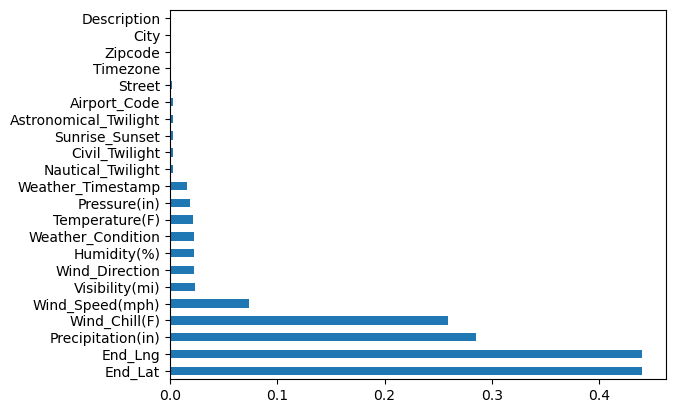

In [16]:
# let's visualize the missing percentage data to get a complete clearity
missing_col .loc[missing_col!=0].plot(kind='barh')

Wind_Chill , Precipitation , End_Lng , End_Lat,
These columns are mostly null or the data is missing,
We can remove these columns.

### 3 Exploratory Analysis and Visualization

#### 1. Cities

In [17]:
# checking out the unique cities top 20

cities_accident=us_df.City.value_counts()[ :20, ]
cities_accident

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

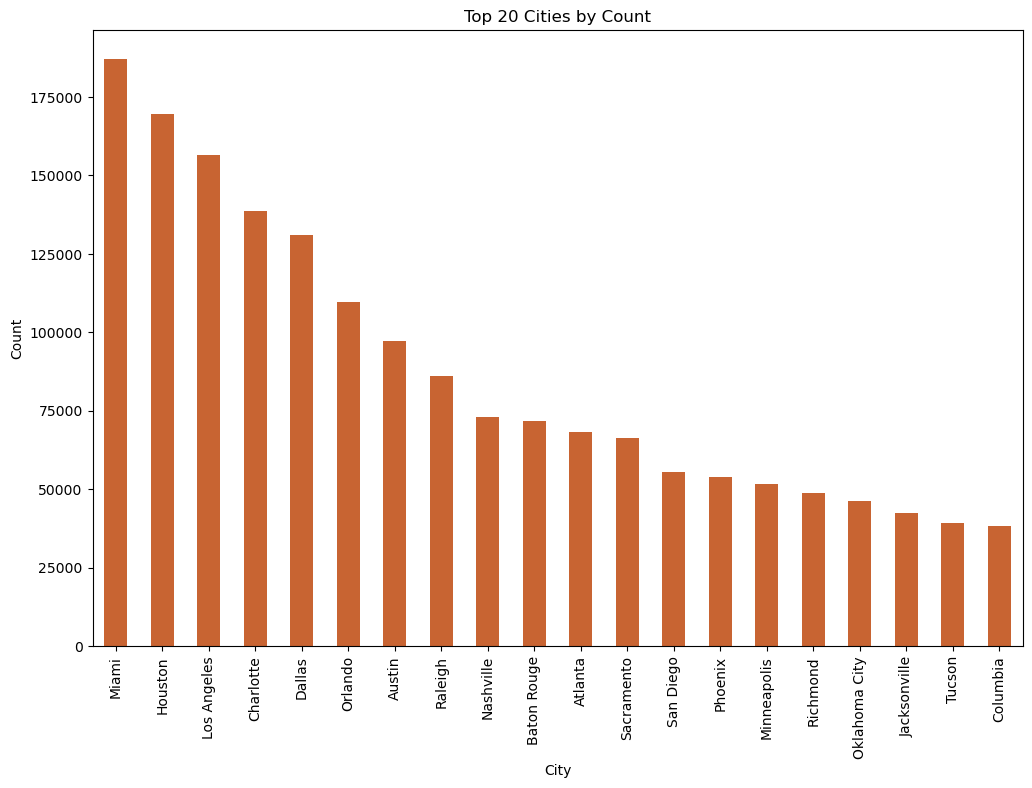

In [18]:
# Represent them
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
cities_accident.plot(kind='bar' ,color = '#C86432')

# Adding title and labels
plt.title('Top 20 Cities by Count')
plt.xlabel('City')
plt.ylabel('Count')


plt.show()


In [19]:
# now we calculate percentage of the accident compared in these data

cities_accident=us_df.City.value_counts()[ :20, ]
print((cities_accident/np.sum(cities_accident))*100)


City
Miami            10.800836
Houston           9.800708
Los Angeles       9.042696
Charlotte         8.011885
Dallas            7.566196
Orlando           6.340826
Austin            5.625805
Raleigh           4.974000
Nashville         4.214197
Baton Rouge       4.136650
Atlanta           3.940069
Sacramento        3.829008
San Diego         3.207250
Phoenix           3.118841
Minneapolis       2.975189
Richmond          2.822466
Oklahoma City     2.663386
Jacksonville      2.452763
Tucson            2.271147
Columbia          2.206082
Name: count, dtype: float64


In [20]:
cities_accident_actual=us_df.City.value_counts()
cities_accident_actual

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


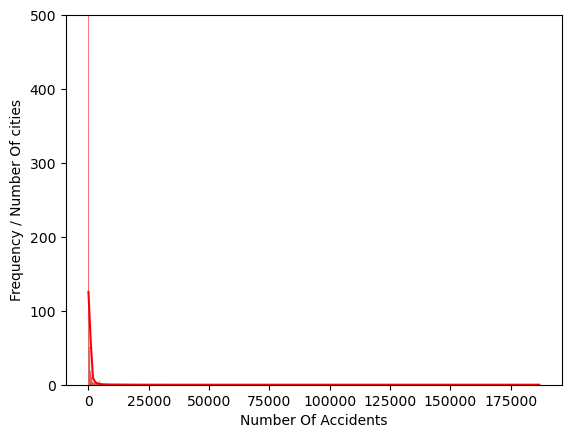

In [21]:
cities_accident_actual=us_df.City.value_counts()
sns.histplot(cities_accident_actual, color='Red', kde=True)
plt.ylim(0,500)
plt.ylabel('Frequency / Number Of cities')
plt.xlabel('Number Of Accidents')
plt.show()

#### Here we analyze that most of the cities have lower than 1000 accidents

In [22]:
high_accident_cities=cities_accident_actual[cities_accident_actual>=1000]
low_accident_cities=cities_accident_actual[cities_accident_actual<1000]

In [23]:
len(high_accident_cities)


1218

In [24]:
len(low_accident_cities)

12460

In [25]:
len(high_accident_cities)/len(cities_accident_actual)*100

8.904810644831116

#### Less than 9% of the citites have 1000 yearly accidents

In [26]:
len(low_accident_cities)/len(cities_accident_actual)*100

91.09518935516888

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


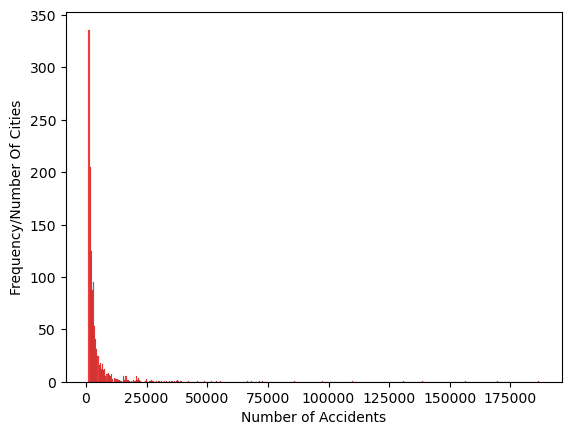

In [27]:

sns.histplot(high_accident_cities, color='Red')
plt.ylabel('Frequency/Number Of Cities')
plt.xlabel('Number of Accidents')
plt.show()






C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


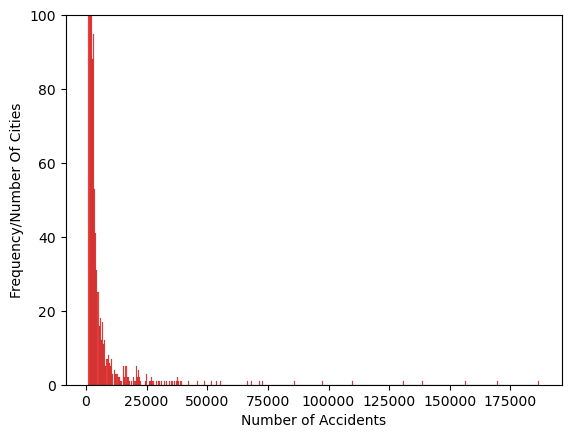

In [28]:

sns.histplot(high_accident_cities, color='Red')
plt.ylim(0,100) # To get a clear view
plt.ylabel('Frequency/Number Of Cities')
plt.xlabel('Number of Accidents')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


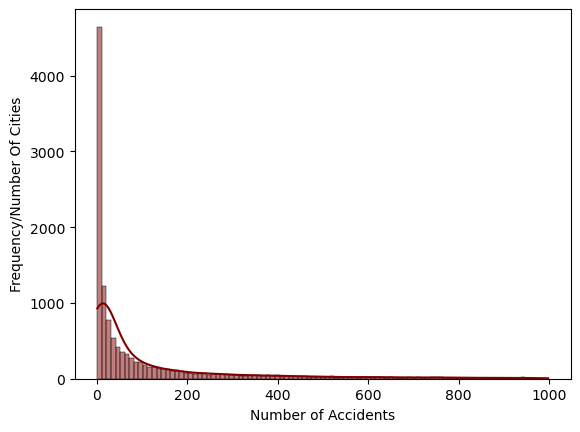

In [29]:
sns.histplot(low_accident_cities, color='Maroon', kde=True)

plt.ylabel('Frequency/Number Of Cities')
plt.xlabel('Number of Accidents')
plt.show()


In [30]:
low_accident_cities[low_accident_cities==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [31]:
len(low_accident_cities[low_accident_cities==1])

1023

### INSIGHTS -:
1. No data for New York
2.  less than 9% of the citites have more than 1000 accidents per year
3.  There are 1023  cities which have only one accident reported a year

### Start Time

In [32]:
us_df.Start_Time.dtype

dtype('O')

In [33]:
# convert Object to datetime data type
us_df.Start_Time= pd.to_datetime(us_df.Start_Time, errors='coerce') 

In [34]:
us_df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [35]:
# We get the hours from the Timestamp
us_df.Start_Time.dt.hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

C:\Users\Akshat Chhetri\AppData\Local\Temp\ipykernel_25316\4271255498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(us_df.Start_Time.dt.hour,bins=24, norm_hist=True, kde=False,color='Blue')


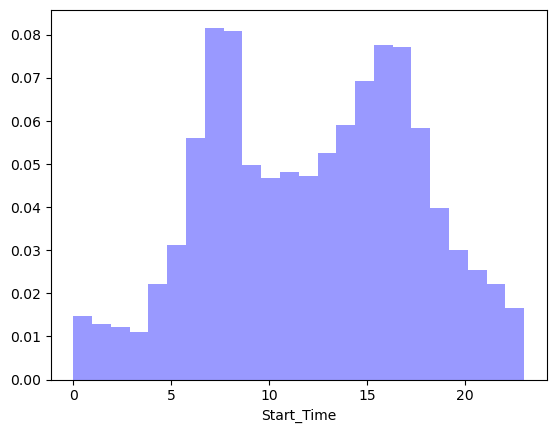

In [36]:
sns.distplot(us_df.Start_Time.dt.hour,bins=24, norm_hist=True, kde=False,color='Blue')
plt.show()

#### 1. High accidents occurs between 7 am to  10 am due to people going to work or leave their children for school
#### 2. Another Highest time of accident is from 3pm to 6pm

C:\Users\Akshat Chhetri\AppData\Local\Temp\ipykernel_25316\710878026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(us_df.Start_Time.dt.dayofweek,bins=7, norm_hist=True, kde=False,color='Violet')


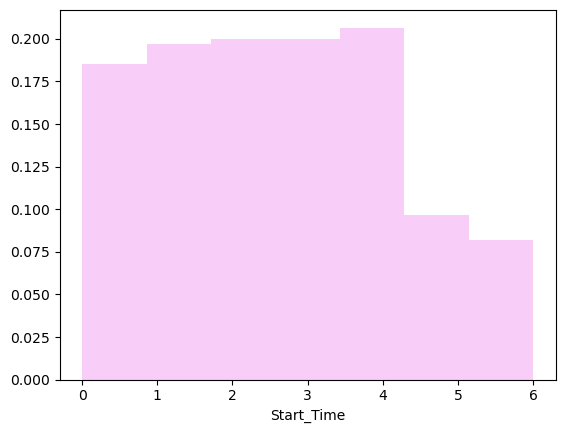

In [37]:
# monday is 0 and sunday is 6
sns.distplot(us_df.Start_Time.dt.dayofweek,bins=7, norm_hist=True, kde=False,color='Violet')
plt.show()

#### On Weekends the accidents are less

#### Is the distribution of accidents by hour same on the weekends as on the weekdays

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


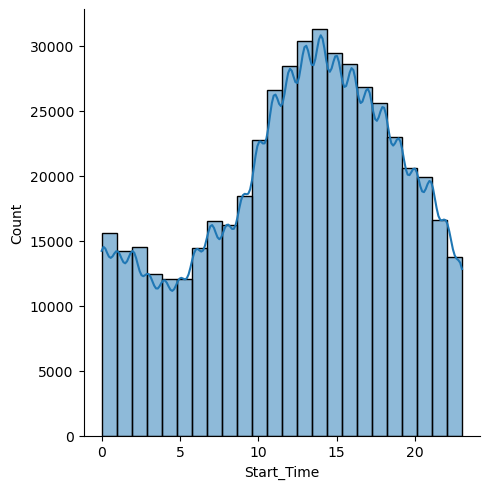

In [38]:
sunday_start_time=us_df.Start_Time[us_df.Start_Time.dt.dayofweek == 6]
sns.displot(sunday_start_time.dt.hour, bins=24, kde=True )


#### In Sundays the peak is in between 11 am to 6pm, unlike week days -> Possibly in this time people go for outing to enjoy their weekends


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


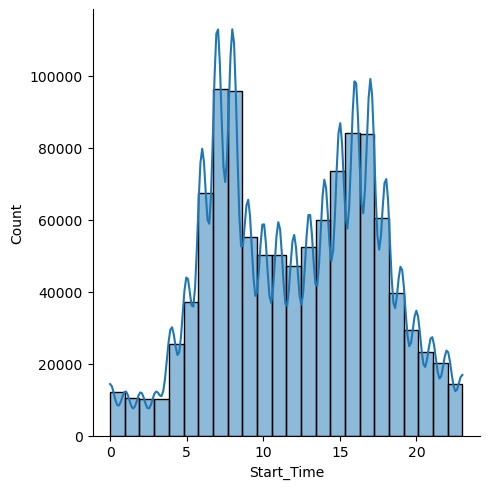

In [39]:
monday_start_time=us_df.Start_Time[us_df.Start_Time.dt.dayofweek == 0]
sns.displot(monday_start_time.dt.hour, bins=24, kde=True )


#### In week days we can see that there are 2 curves and which tells that people going to work in morning and other curve denotes people returning from work which may be the cause of accidents



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


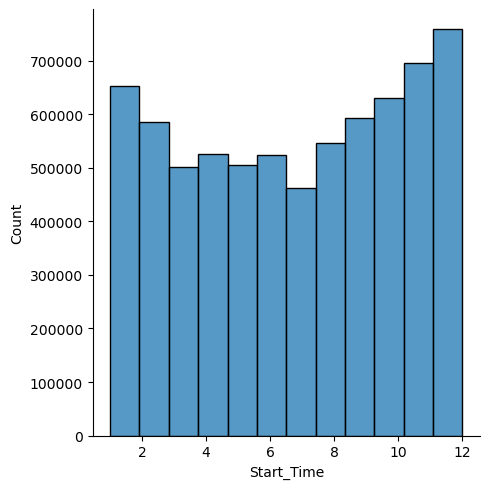

In [40]:
# Now we will check the months
sns.displot(us_df.Start_Time.dt.month, bins=12 )

#### Around Summer Season there are less accidents as compared to the Winter Season
#### Reason can be that in winters its snow time and the roads are wet and slippery which can be a main reason for the more number of accidents

#### What is the trend of accidents year over year (decreasing/increasing?)

In [41]:
Accident_over_y=us_df.Start_Time.dt.year.value_counts()
Accident_over_y

Start_Time
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

In [42]:
Accident_over_y=us_df.Start_Time.dt.year.value_counts()
Accident_over_y_df=pd.DataFrame({
    'Year':Accident_over_y.index ,'Count' :Accident_over_y.values
})
Accident_over_y_df
Accident_over_y_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


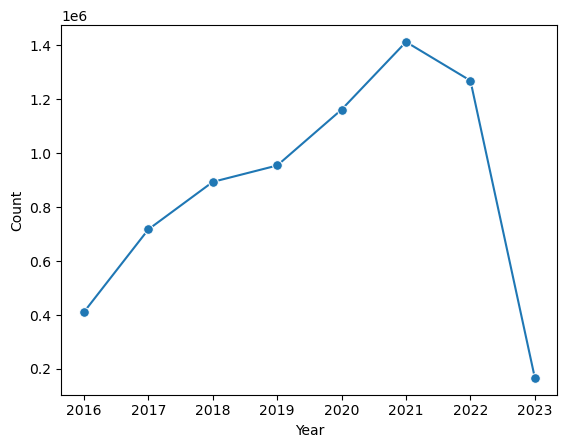

In [43]:
sns.lineplot(x=Accident_over_y_df['Year'], y=Accident_over_y_df['Count'],marker='o',markersize=7 )
plt.show()

#### From this we get to know that most of the accident or maximum number of accident occured in 2021

### 3.Start Latitude , Start Longitude

In [44]:
us_df.Start_Lat[0:5]

0    39.865147
1    39.928059
2    39.063148
3    39.747753
4    39.627781
Name: Start_Lat, dtype: float64

In [45]:
us_df.Start_Lng[0:5]

0   -84.058723
1   -82.831184
2   -84.032608
3   -84.205582
4   -84.188354
Name: Start_Lng, dtype: float64

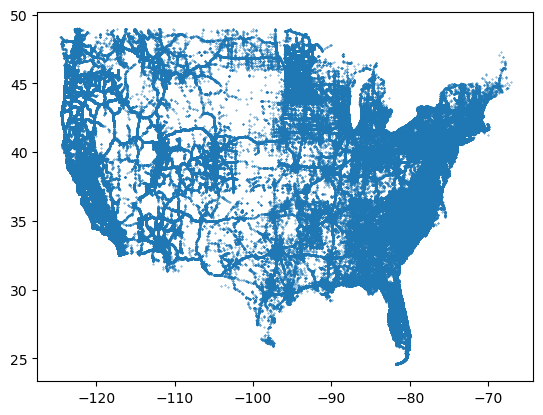

In [46]:
plt.scatter(x=us_df.Start_Lng,y=us_df.Start_Lat, s=.1)
plt.show()

#### As we know that Latitudes are horizontal lines that measure distance north or south of the equator ,Longitudes are vertical lines that measure east or west   

#### Here in our scatter plot the dense area shows that accidents occurs in these region and the reason can be that these areas are more populated as compared to the less dense areas

### 4. Weather Condition

In [47]:
wc=us_df['Weather_Condition'].value_counts()
wc


Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

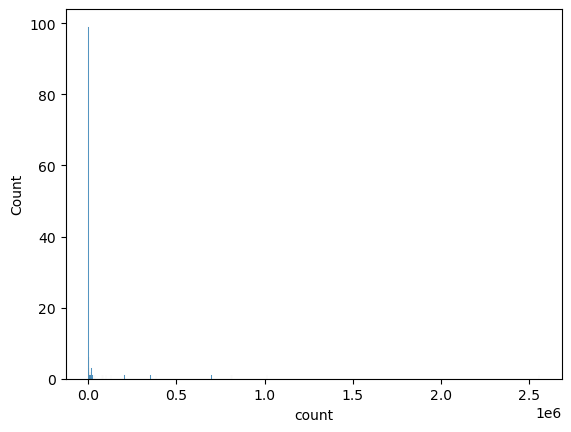

In [48]:
sns.histplot(wc)


In [49]:
Weather_cond=us_df['Weather_Condition'].value_counts()
Weather_cond_df = pd.DataFrame({'Weather_Condition': Weather_cond.index, 'Count': Weather_cond.values})
#Weather_cond_df [0:50]
High_wc=Weather_cond_df[Weather_cond_df['Count']>=10000 ]
High_wc
Low_wc=Weather_cond_df[(Weather_cond_df['Count']<10000) & (Weather_cond_df['Count']>=500)]
Low_wc

,Weather_Condition,Count
25,Heavy T-Storm,9671
26,Light Rain / Windy,7946
27,Light Snow / Windy,6826
28,Heavy Snow,5003
29,Light Thunderstorms and Rain,4931
30,Drizzle,4726
31,Thunderstorm,4438
32,Patches of Fog,4144
33,Mist,3539
34,Light Freezing Rain,3465


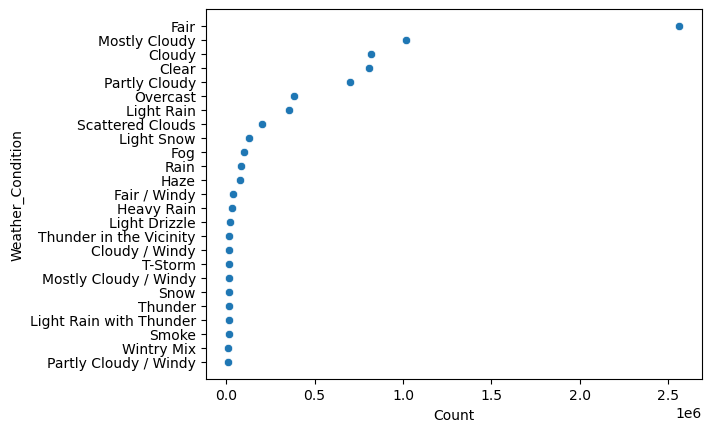

In [50]:

sns.scatterplot(y=High_wc['Weather_Condition'], x=High_wc['Count'])
plt.show()

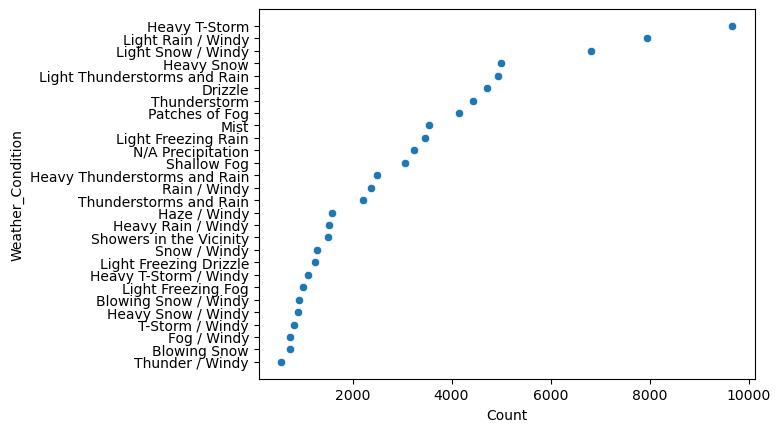

In [51]:

sns.scatterplot(y=Low_wc['Weather_Condition'], x=Low_wc['Count'])
plt.show()

#### From the Scatterplot we are able to analyze that in the fair Weather Condition the number of accidents are more hence we can say that people are reckless  at this situation 

#### Then fairly cloudy, cloudy and so on the Weather Condition in this data is less responsible for accidents to occur

In [52]:
us_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### 5. Day or Night

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


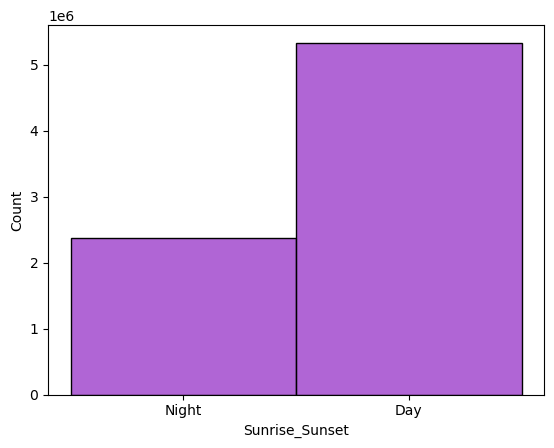

In [53]:
sns.histplot(us_df['Sunrise_Sunset'], bins=2 , color ='#9632C8')
plt.show()

#### Here We analyze that the accident mostly occurs at Day time compared to night time.
#### Possible reasons may be office, school time and here people maybe in rush. At night people mostly sleeps and travel less.

### 6. Traffic Calming VS Traffic_Signal

In [54]:
us_df['Traffic_Calming'].value_counts()

Traffic_Calming
False    7720796
True        7598
Name: count, dtype: int64

In [55]:
us_df['Traffic_Signal'].value_counts()

Traffic_Signal
False    6584622
True     1143772
Name: count, dtype: int64

In [56]:
t_ts=us_df[us_df['Traffic_Signal']==True]
t_ts=len(t_ts)
t_ts

1143772

In [57]:
t_tc=us_df[us_df['Traffic_Calming']==True]
t_tc=len(t_tc)
t_tc

7598

In [58]:
traffic=[t_ts,t_tc]
traffic

[1143772, 7598]

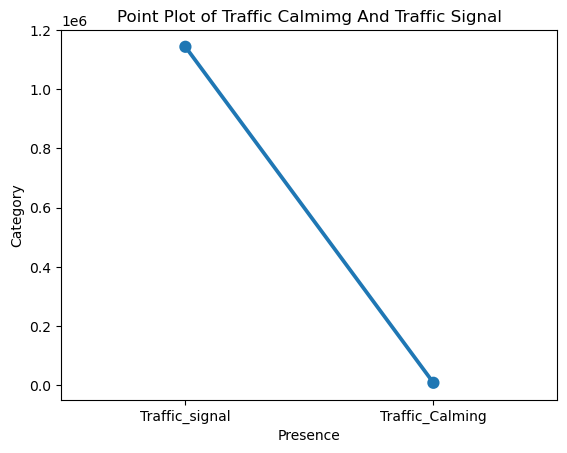

In [59]:
traffic_pd=data = pd.DataFrame({
    'Category': traffic,
    'Presence': ['Traffic_signal', 'Traffic_Calming']
})
sns.pointplot(x='Presence', y='Category', data=data)
plt.title('Point Plot of Traffic Calmimg And Traffic Signal')
plt.show()

#### Here we compare Traffic Calming and Traffic Signal points and we anlayze that the Traffic Calming is more effective related to the Traffic Signal. Possibility may be people in hurry may compromise with the fine of Traffic Light maybe in a a hurry but Traffic Calming cannot be Overcome.

### Insights-:
1. High accidents occurs between 7 am to  10 am due to people going to work or 
leave their children for school and then between 3pm to 6pm.
2. On Weekends these time changes and range between 11 to 6 when people may go for outings.
3. Less than 9% of the citites have more than 1000 accidents per year
4. There are 1023  cities which have only one accident reported a year
5. Around Summer Season there are less accidents as compared to the Winter Season due to snow roads are wet and slippery.
6. Max accidents occured in year 2021 (from 2016 to 2023).
7. Max accidents occured in the Fair weather which is clear that people are reckless.
8. As compared to Day or Night most accidents occurs at Day , mostly people prefer travelling during day than night.
9. 

Ask Question
1. Are there more accident in warmer or colder areas ?
2. Which 5 state have the highest number of accident ? How about per capita ?
3. No Data from New York.(As we analyze the city with accident and New York data was not           present)
4. Among the to[pp 100 cities in number of accidents, which state do they belong to?
5. What time of the day the accident are more frequent in?
6. Which day of the week have the most accidents ?
7. Which Month have most accidents ?
9.  

In [60]:
l=[1,2,3,4]

In [61]:
[x for x in l if x%2==0]

[2, 4]